#Problem 1


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('2d-data.csv').values # Read the dataset

##(a)

In [9]:
def compute_mean(data):
    return np.mean(data, axis=0)  # Function to calculate mean

mean_data = compute_mean(data)
data = data - mean_data  # To center the data
print("Mean of 2d-data:", mean_data)

Mean of 2d-data: [ 5.         16.98303372]


##(b)

In [10]:
def compute_covariance_matriX(data, mean_data):
    return (data.T @ data) / (data.shape[0] - 1) # Function to calculate covariance matrix

cov_matrix = compute_covariance_matriX(data, mean_data)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 8.35837506 16.60377902]
 [16.60377902 33.96039075]]


##(c)

In [11]:
def project_data(data, basis):
    return data @ basis.T    # Function to calculate projected data

basis = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]]) # Basis vectors after 45-degree rotation
projected_data = project_data(data, basis )
print("Projected data:\n", projected_data)

Projected data:
 [[ -9.89969955  -2.82863174]
 [ -9.0922396   -2.03532808]
 [-10.52872611  -3.48597088]
 ...
 [ 10.23166909   3.18891386]
 [ 10.08697909   3.03006757]
 [  8.87566609   1.80459828]]


##(d)

In [12]:
# Tp calculate eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Finding the index of the maximum eigenvalue
max_eigenvalue_index = np.argmax(eigenvalues)

# First principal component corresponding to the maximum eigenvalue
first_principal_component = eigenvectors[:, max_eigenvalue_index]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("First principal component:\n", first_principal_component)

Eigenvalues:
 [ 0.19390463 42.12486118]
Eigenvectors:
 [[-0.89737827 -0.4412621 ]
 [ 0.4412621  -0.89737827]]
First principal component:
 [-0.4412621  -0.89737827]


##(e)

In [13]:
# Project data onto the first principal component
projected_1D = (data ) @ first_principal_component.reshape(-1, 1)

# Reconstruct the data using first principal component
reconstructed_data = projected_1D @ first_principal_component.reshape(1, -1)

# Compute mean squared error for reconstructed_data
msre = np.mean((data - reconstructed_data) ** 2)

print("Mean Squared Reconstruction Error:", msre)


Mean Squared Reconstruction Error: 0.09685536033220488


##(f)

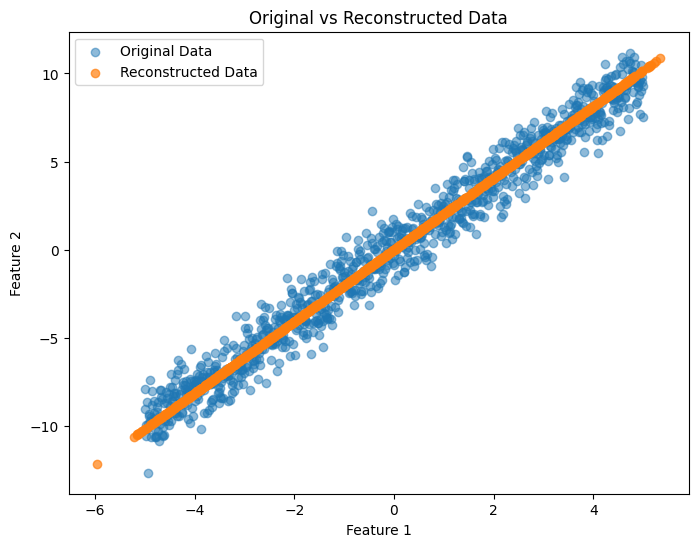

In [14]:
# Plot original and reconstructed data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", alpha=0.5)
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed Data", alpha=0.7)
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original vs Reconstructed Data")
plt.show()

## (II)

PCA is a technique for linear dimensionality reduction, indicating that it believes the principal components represent the greatest variance linearly. When the connection between y and x is non-linear, PCA might not be as efficient.

Linear Assumption: PCA identifies directions that most effectively account for the variance in the data through linear projections. If the actual relationship is a non-linear function, PCA may struggle.

Loss of Significant Information: When the data exists on a curve, PCA will identify principal components that optimize variance but may fail to accurately reflect the true structure of the data. The forecast could change the actual framework.

Dimensionality Reduction Constraint: PCA is most effective for dimensionality reduction when the variance is concentrated along some key linear axes. In non-linear situations, PCA may struggle to identify a suitable low-dimensional representation since the variance could be distributed across various dimensions in a non-linear manner.